In [76]:
import matplotlib.pyplot as plt 
import json
%matplotlib inline

import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [84]:
filepath = "../reports/histories/tsn_reports.json"

data = []
with open(filepath, 'r') as file:
    for line in file:
        data.append(json.loads(line))

data[]

{'lr': 0.01,
 'data_time': 1.113727068901062,
 'grad_norm': 11.318521118164062,
 'loss': 1.7987976551055909,
 'top1_acc': 0.5,
 'top5_acc': 0.875,
 'loss_cls': 1.7987976551055909,
 'time': 1.188467311859131,
 'epoch': 1,
 'iter': 20,
 'memory': 5597,
 'step': 20}

In [21]:
filtered_indices = [index for index in range(len(data)) if index % 2 == 0]

In [87]:
train_acc = list()
train_loss = list()

val_top1_acc = list()
val_top5_acc = list()

for obj in data:
    # print(obj['iter'])
    if 'iter' in obj.keys():
        if obj['iter'] % 31 == 0:
            train_acc.append(obj['top1_acc'])
            train_loss.append(obj['loss'])

for obj in data:
    # print(obj['iter'])
    if 'acc/top1' in obj.keys():
        val_top1_acc.append(obj['acc/mean1'])
        # val_top5_acc.append(obj['acc/top5'])

scaler = MinMaxScaler()
scaled_loss = scaler.fit_transform(np.array(train_loss).reshape(-1,1))

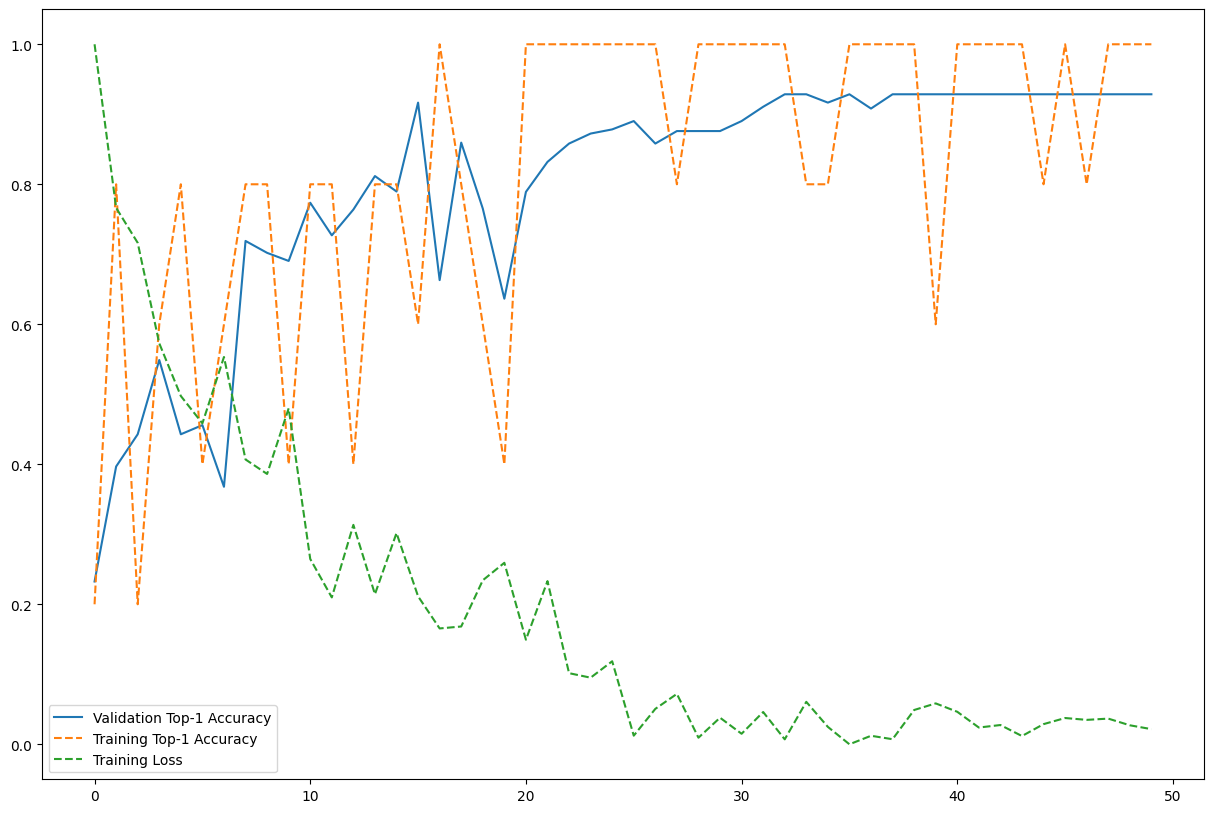

In [89]:
plt.figure(figsize=(15, 10))
plt.plot(val_top1_acc, label='Validation Top-1 Accuracy')
plt.plot(train_acc, linestyle='dashed', label='Training Top-1 Accuracy')
plt.plot(scaled_loss, linestyle='dashed', label='Training Loss')
plt.legend()
plt.show()